In [1]:
from __future__ import print_function
from PYME.recipes import modules
from PYME.LMVis import pipeline
data = pipeline.Pipeline("../data/31_5_series_D.h5r")

Trying to load 3rd party recipe module PYMEcs.recipes.processing
Loaded 3rd party recipe module PYMEcs.recipes.processing
Trying to load 3rd party recipe module PYMEnf.recipes.pymenf
Loaded 3rd party recipe module PYMEnf.recipes.pymenf
Trying to load 3rd party recipe module PYMEcs.recipes.output
Loaded 3rd party recipe module PYMEcs.recipes.output
Trying to load 3rd party recipe module PYMEcs.recipes.localisations
Loaded 3rd party recipe module PYMEcs.recipes.localisations
Trying to load 3rd party recipe module PYMEcs.recipes.base
Loaded 3rd party recipe module PYMEcs.recipes.base


In [2]:
# load our saved recipe
data.recipe.update_from_yaml('example1.yaml')
print("Current data source: %s" % data.selectedDataSourceKey) # what is the currently selected data source
print("Available data sources: %s" % ', '.join(data.dataSources.keys())) # look at all the data sources we could select

data.selectDataSource('cytosolC')
print("Number of events in data source cytosolC is %d" % data.x.size)

Current data source: filtered_localizations
Available data sources: cytosolC, coalesced, with_clumps, filtered_localizations, Localizations, clumps, colour_mapped
Number of events in data source cytosolC is 964


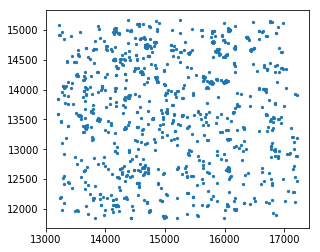

In [3]:
plt.subplot(aspect='equal') # we are trying to get the plot aspect ratio to be correct
plt.scatter(data.x,data.y,s=5)

In [4]:
from PYMEcs.Analysis.eventProperties import evtDensity
dens, intens5K, trange = evtDensity(data)
print("Density: %.2f, Intensity (5K frames): %.2f, frame range: %.2f Kframes" %(dens, intens5K, trange/1e3))

Density: 72.51, Intensity (5K frames): 12.16, frame range: 29.81 Kframes


In [5]:
# you can also supply a recipe as a multiline string

str = """
- tablefilters.FilterTable:
   filters:
     A: [5, 20000]
     error_x: [0, 30]
     error_y: [0, 30]
     sig: [95, 200]
   inputName: Localizations
   outputName: filtered_loc_from_str
"""

In [6]:
data.recipe.update_from_yaml('')
print("Available data sources: %s" % ', '.join(data.dataSources.keys())) # look at all the data sources we could select
data.recipe.update_from_yaml(str)
print("Available data sources: %s" % ', '.join(data.dataSources.keys())) # look at all the data sources we could select

Available data sources: Localizations
Available data sources: filtered_loc_from_str, Localizations


## Render image as part of pipeline

Turns out we can even render images as part of applying a recipe to the pipeline. The examples below exploits that.

The syntax to specify such a module directly could be tricky. So therefore it is much better to edit the rendering module in VisGUI or a similar GUI app, and then save as needed.

This is an example for a Gaussian rendering with 10 nm pixel size:

```
- localisations.DensityMapping:
    inputLocalizations: cytosolC
    jitterVariable: error_x
    outputImage: renderCytosolC
    pixelSize: 10.0
    renderingModule: Gaussian
```

In [7]:
data.recipe.update_from_yaml('example2.yaml')
print("Current data source: %s" % data.selectedDataSourceKey) # what is the currently selected data source
print("Available data sources: %s" % ', '.join(data.dataSources.keys())) # look at all the data sources we could select

Created colour filter with chans: []
Current data source: cytosolC
Available data sources: renderCytosolC, cytosolC, coalesced, with_clumps, filtered_loc_from_str, filtered_localizations, Localizations, clumps, colour_mapped


In [8]:
imdata = data.dataSources['renderCytosolC'].data[:,:,0,0].squeeze()

/Users/csoe002/Documents/src/PYME-src/python-microscopy/PYME/IO/DataSources/ArrayDataSource.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  r = self.data.__getitem__(keys)


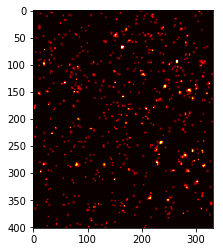

In [9]:
plt.figure()
plt.imshow(imdata,cmap='hot',vmin=0,vmax=0.30)